w00 tensor(1.7000)
b00 tensor(-0.8500)
w01 tensor(-40.8000)
w10 tensor(12.6000)
b10 tensor(0.)
w11 tensor(2.7000)
final_bias tensor(-16.)
Final bias, before optimization: tensor(0.)

Step: 0 Final Bias: tensor(-3.2020)

Step: 1 Final Bias: tensor(-5.7636)

Step: 2 Final Bias: tensor(-7.8129)

Step: 3 Final Bias: tensor(-9.4523)

Step: 4 Final Bias: tensor(-10.7638)

Step: 5 Final Bias: tensor(-11.8131)

Step: 6 Final Bias: tensor(-12.6525)

Step: 7 Final Bias: tensor(-13.3240)

Step: 8 Final Bias: tensor(-13.8612)

Step: 9 Final Bias: tensor(-14.2909)

Step: 10 Final Bias: tensor(-14.6348)

Step: 11 Final Bias: tensor(-14.9098)

Step: 12 Final Bias: tensor(-15.1298)

Step: 13 Final Bias: tensor(-15.3059)

Step: 14 Final Bias: tensor(-15.4467)

Step: 15 Final Bias: tensor(-15.5594)

Step: 16 Final Bias: tensor(-15.6495)

Step: 17 Final Bias: tensor(-15.7216)

Step: 18 Final Bias: tensor(-15.7793)

Step: 19 Final Bias: tensor(-15.8254)

Step: 20 Final Bias: tensor(-15.8623)

Step: 21 Fin

Text(0.5, 0, 'Dose')

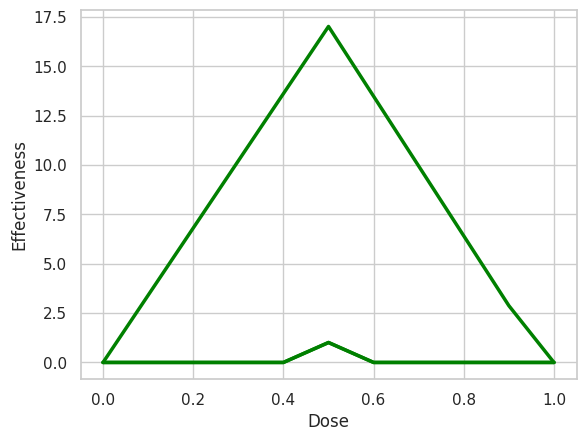

In [2]:


import torch # torch provides basic functions, from setting a random seed (for reproducability) to creating tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import SGD # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent.

import matplotlib.pyplot as plt ## matplotlib allows us to draw graphs.
import seaborn as sns ## seaborn makes it easier to draw nice-looking graphs.




## create a neural network class by creating a class that inherits from nn.Module.
class BasicNN(nn.Module):

    def __init__(self):

        super().__init__()


        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)


    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        ## the next three lines implement the bottom of the neural network (using the bottom node in the hidden layer).
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        ## here, we combine both the top and bottom nodes from the hidden layer with the final bias.
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output # output is the predicted effectiveness for a drug dose.


# Once we have created the class that defines the neural network, we can create an actual neural network and print out its parameters, just to make sure things are what we expect.

# In[ ]:


## create the neural network.
model = BasicNN()

## print out the name and value for each parameter
for name, param in model.named_parameters():
    print(name, param.data)


input_doses = torch.linspace(start=0, end=1, steps=11)

# now print out the doses to make sure they are what we expect...
input_doses


# Now that we have `input_doses`, let's run them through the neural network and graph the output...

# In[ ]:


## create the neural network.
model = BasicNN()

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses,
             y=output_values,
             color='green',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## optionally, save the graph as a PDF.
# plt.savefig('BasicNN.pdf')


## create a neural network by creating a class that inherits from nn.Module.

##       final_bias in two ways:
##       1) we set the value of the tensor to 0, and
##       2) we set "requires_grad=True".
class BasicNN_train(nn.Module):

    def __init__(self): # __init__ is the class constructor function, and we use it to initialize the weights and biases.

        super().__init__() # initialize an instance of the parent class, nn.Module.

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)


#         self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        ## ...so we set it to 0 and tell Pytorch that it now needs to calculate the gradient for this parameter.
        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)

    def forward(self, input):

        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output


# Now let's graph the output of `BasicNN_train`, which is currently not optimized, and compare it to the graph we drew earlier of the optimized neural network.



## create the neural network.
model = BasicNN_train()

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses,
             y=output_values.detach(), ## NOTE: because final_bias has a gradident, we call detach()
                                       ## to return a new tensor that only has the value and not the gradient.
             color='green',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
# plt.savefig('BasicNN_train.pdf')



# In[ ]:


## create the training data for the neural network.
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])


# ...and now let's use that training data to train (or optimize) `final_bias`.

# In[ ]:


## create the neural network we want to train.
model = BasicNN_train()

optimizer = SGD(model.parameters(), lr=0.1)
print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

## this is the optimization loop. Each time the optimizer sees all of the training data is called an "epoch".
for epoch in range(100):


    total_loss = 0


    for iteration in range(len(inputs)):

        input_i = inputs[iteration] ## extract a single input value (a single dose)...
        label_i = labels[iteration] ## ...and its corresponding label (the effectiveness for the dose).

        output_i = model(input_i) ## calculate the neural network output for the input (the single dose).

        loss = (output_i - label_i)**2

        loss.backward() # backward() calculates the derivative for that single value and adds it to the previous one.

        total_loss += float(loss) # accumulate the total loss for this epoch.


    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break

    optimizer.step() ## take a step toward the optimal value.
    optimizer.zero_grad()

    print("Step: " + str(epoch) + " Final Bias: " + str(model.final_bias.data) + "\n")
    ## now go back to the start of the loop and go through another epoch.

print("Total loss: " + str(total_loss))
print("Final bias, after optimization: " + str(model.final_bias.data))





## run the different doses through the neural network
output_values = model(input_doses)

## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses,
             y=output_values.detach(), ## NOTE: we call detach() because final_bias has a gradient
             color='green',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
# plt.savefig('BascNN_optimized.pdf')


# And we see that the optimized model results in the same graph that we started with, so the optimization worked as expected.


